In [1]:
# Import the tools I think I'll need to start with:
import pandas as pd
import matplotlib.pyplot as plt
# Following line now commented-out, having saved the Pandas Profile report
# from pandas_profiling import ProfileReport

In [28]:
%matplotlib inline

In [2]:
df = pd.read_excel('ENB2012_data.xlsx')

In [3]:
# Inspect the data directly
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# List all variables
for col in df.columns:
    print(col)

X1
X2
X3
X4
X5
X6
X7
X8
Y1
Y2


In [81]:
# Basic descriptive statistics for all variables
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
# Generate PandasProfiling report, save html version to notebook directory
# report = ProfileReport(df, title='Building HVAC: First Look', html={'style':{'full_width':True}})
# report.to_file(output_file='HVACReport.html')


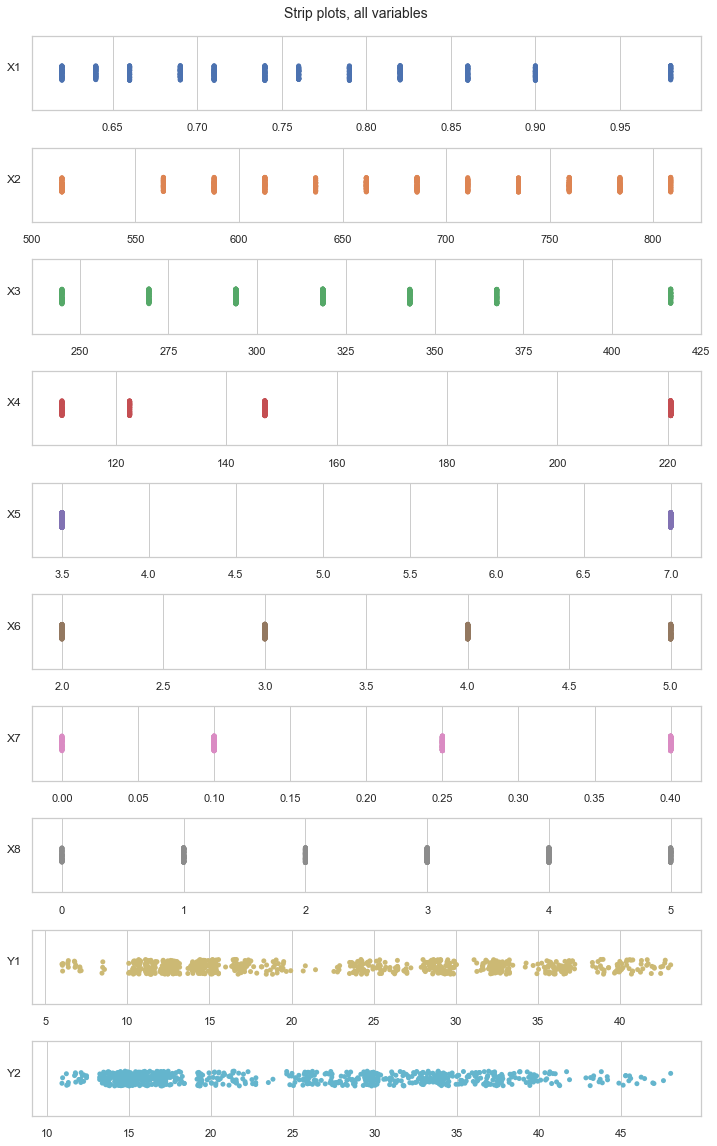

In [193]:
# stripplot distribution of all variables
import seaborn as sns # for chart method
import itertools # for cycling palette
sns.set(style="whitegrid")
palette = itertools.cycle(sns.color_palette()) # different color each subplot
fig = plt.figure(figsize=(12,8)) # roomy display
fig.suptitle('Strip plots, all variables', y=2.05, fontsize=14)
plt.subplots_adjust(top = 2, hspace = 0.5) # cutomize space between
count = 1 # subplot counter
ax = fig.add_subplot(10,1,1) # subplots grid defined
for i in df: # loop through columns, grabbin column name as i
    ax = fig.add_subplot(10,1,count) # plot in this position
    sns.stripplot(x=df[i], color = next(palette)) # plot with color from palette cycle
    ax.set_ylabel(i, rotation=0) # move column name to left side and upright
    ax.set_xlabel('') # remove column name from between plots
    count += 1 # advance subplot counter

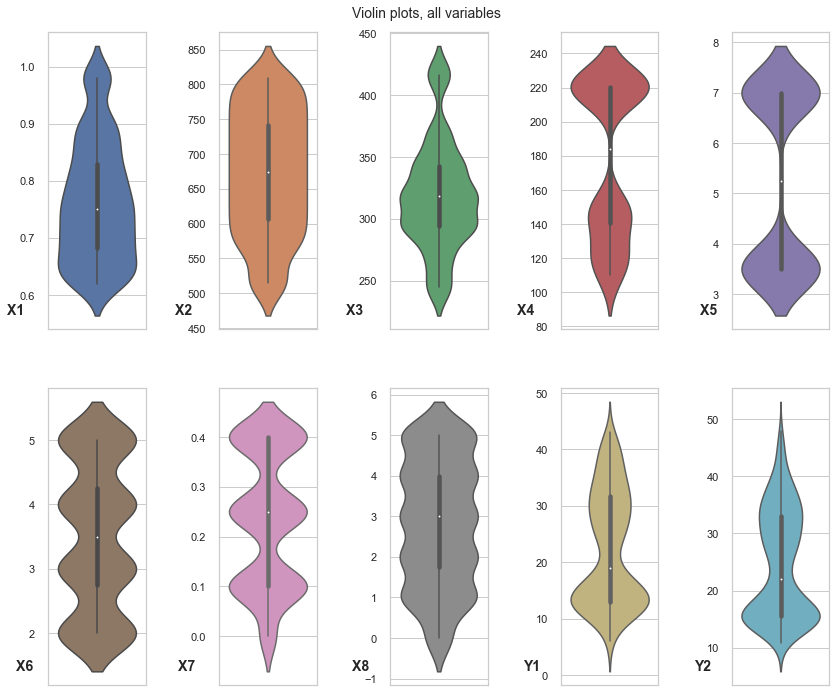

In [187]:
# violinplot distribution of all variables
sns.set(style="whitegrid")
palette = itertools.cycle(sns.color_palette()) # different color each subplot
fig = plt.figure(figsize=(14,12)) # roomy display
fig.suptitle('Violin plots, all variables', y=.91, fontsize=14)
plt.subplots_adjust(wspace = 0.75) # cutomize space between
count = 1 # subplot counter
ax = fig.add_subplot(2,5,1) # subplots grid defined
for i in df: # loop through columns, grabbin column name as i
    ax = fig.add_subplot(2,5,count) # plot in this position
    sns.violinplot(x=df[i], orient = "v", color = next(palette)) # plot with color from palette cycle
    ax.set_ylabel(i, rotation=0, fontsize=14, y=0.04, weight='bold') # rotate label upright
    count += 1 # advance subplot counter

In [4]:
# Create separate heating and cooling dataframes
df_heat = df.drop('Y2', 1)
df_cool = df.drop('Y1', 1)

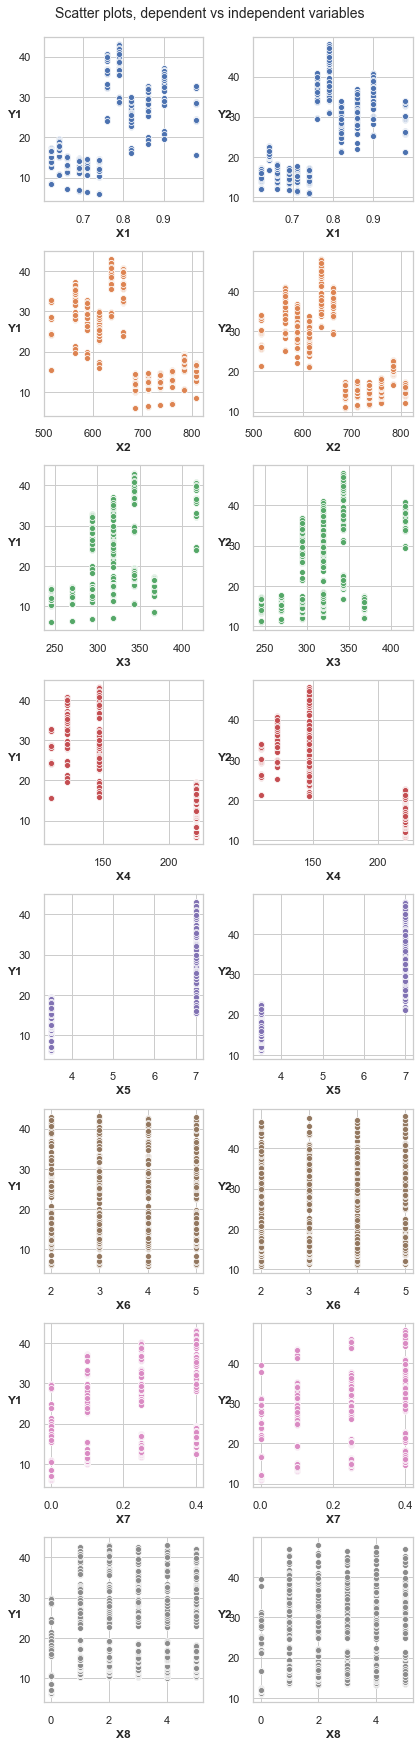

In [197]:
palette = itertools.cycle(sns.color_palette()) # different color each subplot
fig, axes = plt.subplots(8,2, figsize=(6,24)) # subplots grid defined, method allows axes arg in sns.jointplot
fig.suptitle('Scatter plots, dependent vs independent variables', y=1.01, fontsize=14)
count = 0 # axes row counter
for indcol in df_heat:
    if indcol != 'Y1': # exclude dependent variable self plot
        rowcolor = next(palette) # iteration method to select next color in series
        plot_y1 = sns.scatterplot(x=indcol, y='Y1', data=df_heat, color=rowcolor, ax=axes[count,0])
        plot_y1.set_ylabel('Y1', rotation=0, weight='bold')
        plot_y1.set_xlabel(indcol, weight='bold')
        plot_y2 = sns.scatterplot(x=indcol, y='Y2', data=df_cool, color=rowcolor, ax=axes[count,1])
        plot_y2.set_ylabel('Y2', rotation=0, weight='bold')
        plot_y2.set_xlabel(indcol, weight='bold')
        count += 1 # advance subplot counter
        
plt.tight_layout()

In [3]:
# normalize original dataset and replot variable pairings

# create empty dataframe copy with same index
dfnorm = pd.DataFrame(data=None, columns=df.columns).reindex_like(df)

# loop through df normalization
for i in df.columns:
    # set max for column
    colmax = df[i].max()
    # core function
    dfnorm[i] = df[i]/colmax

In [4]:
dfnorm.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.779762,0.830808,0.764706,0.800926,0.750000,0.700000,0.585938,0.562500,0.517568,0.511925
std,0.107936,0.108950,0.104745,0.204834,0.250163,0.223753,0.333051,0.310192,0.234111,0.198070
min,0.632653,0.636364,0.588235,0.500000,0.500000,0.400000,0.000000,0.000000,0.139443,0.226941
25%,0.696429,0.750000,0.705882,0.638889,0.500000,0.550000,0.250000,0.350000,0.301450,0.325213
50%,0.765306,0.833333,0.764706,0.833333,0.750000,0.700000,0.625000,0.600000,0.439675,0.459713
75%,0.846939,0.916667,0.823529,1.000000,1.000000,0.850000,1.000000,0.800000,0.734745,0.689829
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Create separate heating and cooling dataframes from normalized dataset
dfnorm_heat = dfnorm.drop('Y2', 1)
dfnorm_cool = dfnorm.drop('Y1', 1)

In [7]:
# Working out syntax to separate datasets by X5 value
dfnorm_heat_lo = dfnorm_heat.loc[dfnorm_heat['X5'] == 0.5]
dfnorm_heat_lo.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,384.000000,384.000000,384.000000,384.0,384.0,384.000000,384.000000,384.000000,384.000000
mean,0.690476,0.924242,0.735294,1.0,0.5,0.700000,0.585938,0.562500,0.309478
std,0.041989,0.051820,0.100591,0.0,0.0,0.223899,0.333269,0.310394,0.061990
min,0.632653,0.848485,0.588235,1.0,0.5,0.400000,0.000000,0.000000,0.139443
25%,0.653061,0.878788,0.647059,1.0,0.5,0.550000,0.250000,0.350000,0.268561
50%,0.688776,0.924242,0.735294,1.0,0.5,0.700000,0.625000,0.600000,0.301276
75%,0.724490,0.969697,0.823529,1.0,0.5,0.850000,1.000000,0.800000,0.350116
max,0.755102,1.000000,0.882353,1.0,0.5,1.000000,1.000000,1.000000,0.452900


In [5]:
# Separate remaining datasets by X5 value
dfnorm_heat_lo = dfnorm_heat.loc[dfnorm_heat['X5'] == 0.5]
dfnorm_heat_lo = dfnorm_heat_lo.drop('X5', 1)
dfnorm_cool_lo = dfnorm_cool.loc[dfnorm_cool['X5'] == 0.5]
dfnorm_cool_lo = dfnorm_cool_lo.drop('X5', 1)
dfnorm_heat_hi = dfnorm_heat.loc[dfnorm_heat['X5'] == 1]
dfnorm_heat_hi = dfnorm_heat_hi.drop('X5', 1)
dfnorm_cool_hi = dfnorm_cool.loc[dfnorm_cool['X5'] == 1]
dfnorm_cool_hi = dfnorm_cool_hi.drop('X5', 1)

In [6]:
import seaborn as sns

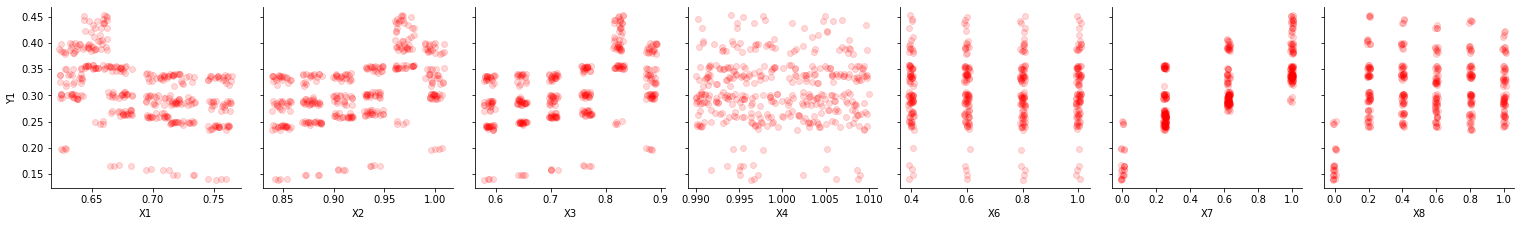

In [25]:
# Adapting 6th example in https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships
# to create row of regplots for each independent variable against the dependent
g = sns.PairGrid(dfnorm_heat_lo, y_vars=["Y1"], x_vars=["X1", "X2", "X3", "X4", "X6" ,"X7", "X8"], height=3)
g.map(sns.regplot, scatter_kws={'alpha':0.15,'color': 'red'}, line_kws={'color': 'black'}, x_jitter=.01)
g.fig.suptitle('dfnorm_heat_lo', x=0.05, y=1.08, fontsize=18)
plt.show()

In [50]:
# Now that we've fine tuned output, define as function
def reg_row(dataset, indvar, rowcolor):
    # returns name of dataframe; .name method didn't work; https://stackoverflow.com/questions/54137694/how-to-print-dataframe-name-in-title-of-a-plot
    datasetname =[x for x in globals() if globals()[x] is dataset][0] 
    g = sns.PairGrid(dataset, y_vars=[indvar], x_vars=["X1", "X2", "X3", "X4", "X6" ,"X7", "X8"], height=3)
    g.map(sns.regplot, scatter_kws={'alpha':0.15,'color': rowcolor}, line_kws={'color': 'black'}, x_jitter=.01)
    g.fig.suptitle(str(datasetname), x=0.05, y=1.08, fontsize=18)
    plt.show()

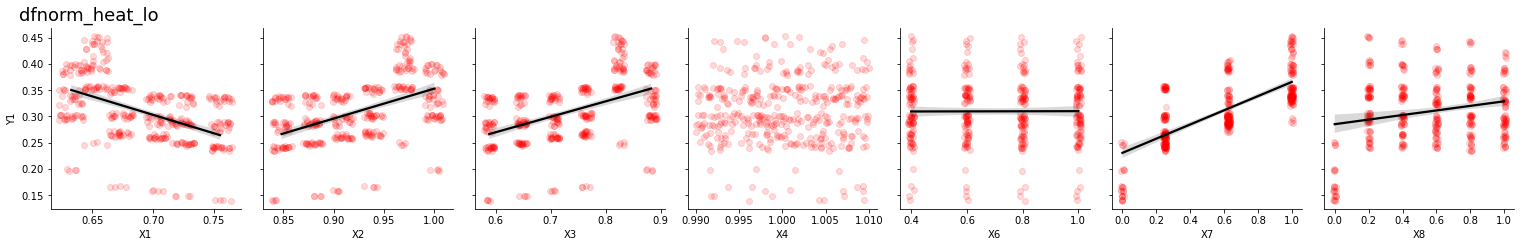

In [51]:
reg_row(dfnorm_heat_lo, "Y1", 'red')

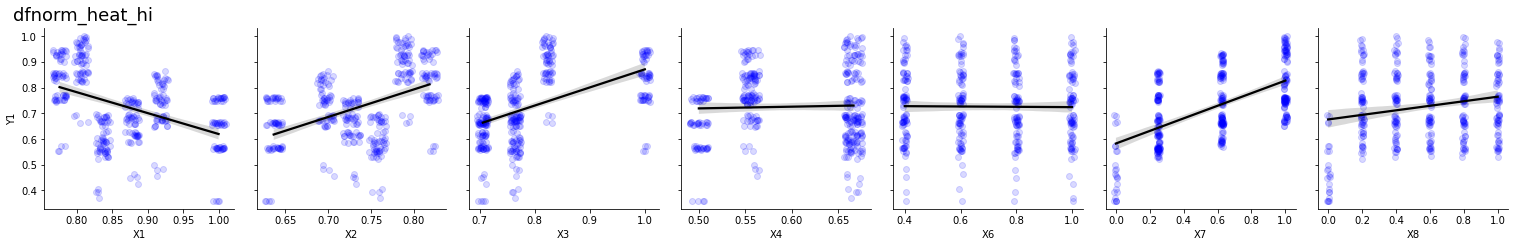

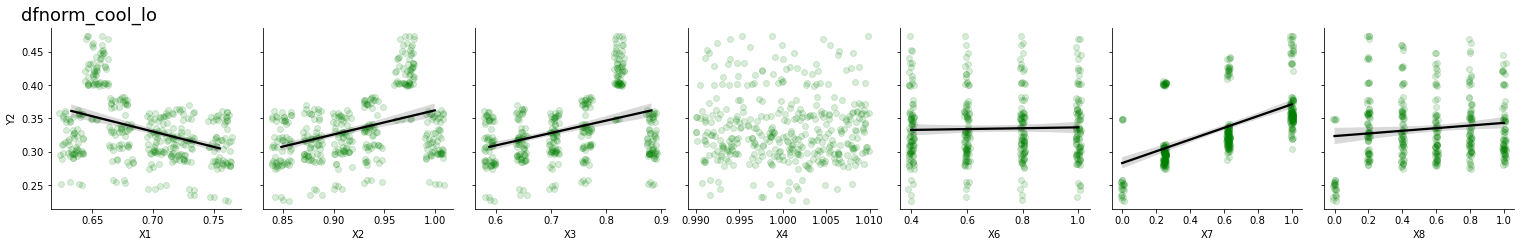

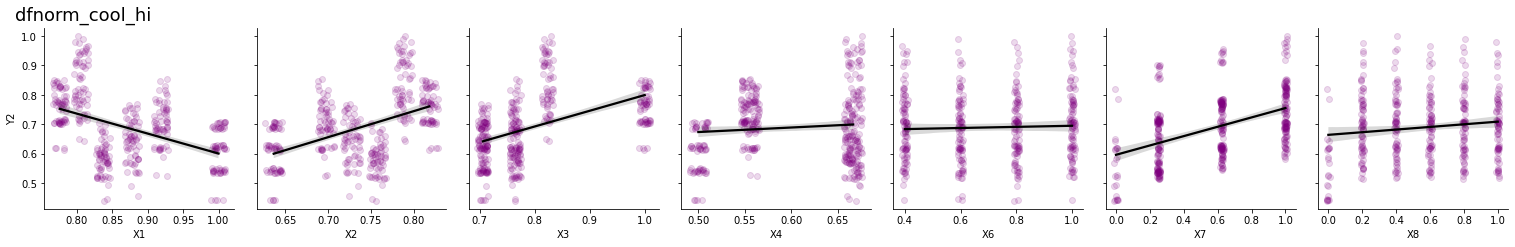

In [52]:
reg_row(dfnorm_heat_hi, "Y1", 'blue')
reg_row(dfnorm_cool_lo, "Y2", 'green')
reg_row(dfnorm_cool_hi, "Y2", 'purple')

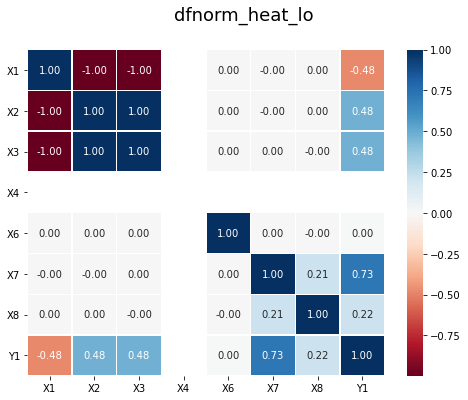

In [65]:
# Working out desired correlation matrix appearance
dfnhl_corr = dfnorm_heat_lo.corr()
datasetname =[x for x in globals() if globals()[x] is dfnorm_heat_lo][0] # that funky dataframe name code
plt.figure(figsize=(8,6))
sns.heatmap(dfnhl_corr, annot=True, linewidths=0.5, cmap='RdBu', fmt=".2f")
plt.yticks(rotation = 0)
plt.suptitle(str(datasetname), fontsize=18)
plt.show()

In [7]:
# Correlation matrix function for the four dataframes
def hvaccorrmap(dataset):
    df_corr = dataset.corr()
    datasetname =[x for x in globals() if globals()[x] is dataset][0]
    plt.figure(figsize=(8,6))
    sns.heatmap(df_corr, annot=True, linewidths=0.5, cmap='RdBu', fmt=".2f")
    plt.yticks(rotation = 0)
    plt.suptitle(str(datasetname), fontsize=18)
    plt.show()

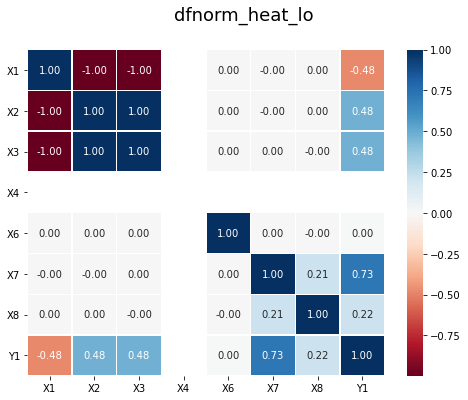

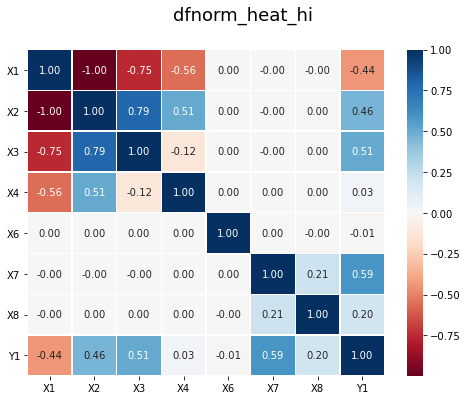

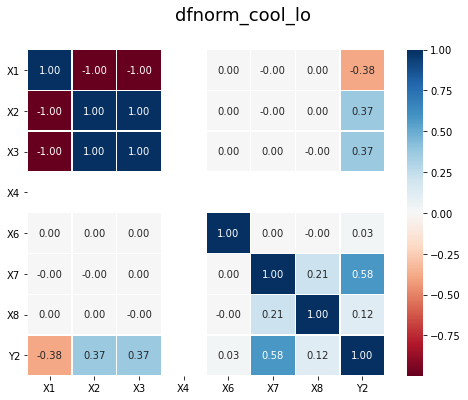

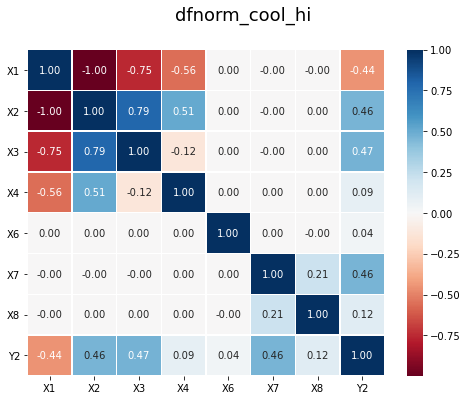

In [8]:
list = [dfnorm_heat_lo, dfnorm_heat_hi, dfnorm_cool_lo, dfnorm_cool_hi]
for dataset in list:
    hvaccorrmap(dataset)